# #5c - Accessing and Plotting Meshes

In this tutorial we'll expose and plot the mesh that PHOEBE uses to compute the model and learn how to create plots/animations of the mesh quantities.

This interactive workshop tutorial covers many of the same topics as the corresponding online tutorials:

* [Advanced: Accessing and Plotting Meshes](http://phoebe-project.org/docs/2.3/tutorials/meshes.ipynb)

# Setup

Uncomment the line below if necessary to see inline plots

In [1]:
#%matplotlib inline

In [2]:
import phoebe
from phoebe import u,c

In [3]:
logger = phoebe.logger(clevel='WARNING')

In [4]:
b = phoebe.default_binary()

# Meshes

We already covered adding a mesh dataset, but now let's look at what gets returned by the model and how to plot meshes.

In [5]:
b.add_dataset('lc', compute_times=phoebe.linspace(0,1,101), dataset='lc01')

<ParameterSet: 19 parameters | contexts: dataset, compute, constraint>

In [6]:
b.add_dataset('mesh', compute_times=[0, 0.25, 0.5, 0.75], dataset='mesh01')

<ParameterSet: 7 parameters | contexts: dataset, compute, constraint>

In [7]:
print(b.get_parameter('columns', dataset='mesh01').choices)

['volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'intensities@lc01', 'normal_intensities@lc01', 'abs_intensities@lc01', 'abs_normal_intensities@lc01', 'boost_factors@lc01', 'ldint@lc01', 'pblum_ext@lc01', 'abs_pblum_ext@lc01', 'ptfarea@lc01']


In [8]:
b.set_value('columns', value=['teffs', 'loggs', '*intensities*'])

In [9]:
b.get_value('columns')

['teffs', 'loggs', '*intensities*']

In [10]:
b.get_value('columns', expand=True)

['teffs',
 'loggs',
 'intensities@lc01',
 'normal_intensities@lc01',
 'abs_intensities@lc01',
 'abs_normal_intensities@lc01']

In [11]:
b.run_compute()

<ParameterSet: 84 parameters | kinds: mesh, lc>

Let's look at the Parameters in the model that have been tagged with our mesh dataset.

In [12]:
b.filter(context='model', dataset='mesh01').qualifiers

['times',
 'uvw_elements',
 'uvw_normals',
 'xyz_elements',
 'xyz_normals',
 'loggs',
 'teffs']

Here we see that we have each of our requested columns along with a few default that are required for the geometry of the mesh itself.

Let's look at the default mesh plot.  Since we have meshes stored at several times, we should provide a single time at which we want the meshes drawn.  Let's choose quarter-phase so that we can see both stars.

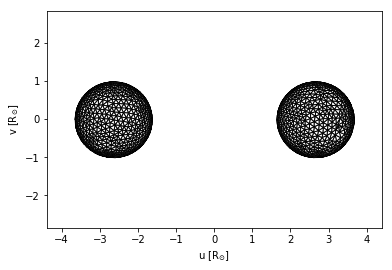

In [13]:
afig, mplfig = b.filter(dataset='mesh01').plot(time=0.25, show=True)

Now if we want to, we can choose separate columns for facecolor and edgecolor (or pass "None" **as a string** to turn off edges, or "face" to color the same as the faces).

Sat, 06 Jul 2019 16:28 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.250000, assuming named color
Sat, 06 Jul 2019 16:28 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.250000, assuming named color


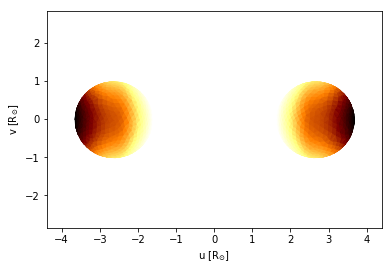

In [14]:
afig, mplfig = b.filter(dataset='mesh01').plot(time=0.25, fc='teffs', ec="face", show=True)

If we wanted, we can even override the default "mesh" plot and plot any two columns against each other in a scatter plot.

**NOTE** if you get a `KeyError: 'z'` error here, this was just fixed on Saturday, so either update or pass `z=0` below.

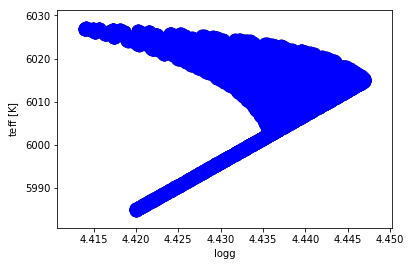

In [15]:
afig, mplfig = b.filter(dataset='mesh01').plot(time=0.25, x='loggs', y='teffs', show=True)

All the Parameters tagged in the model with dataset='mesh01' are passband-*independent*.  Passband-*dependent* Parameters are exposed as well, but they are tagged with the lc/rv dataset instead (but still with kind='mesh' instead of kind='lc' or 'rv').  To see all of these, let's filter on kind='mesh' instead of dataset='mesh01'.  These will only be available for times that occur in **both** the lc and mesh datasets.

In [16]:
b.filter(context='model', kind='mesh').datasets

['mesh01', 'lc01']

In [17]:
b.filter(context='model', kind='mesh', dataset='lc01').qualifiers

['intensities',
 'normal_intensities',
 'abs_intensities',
 'abs_normal_intensities']

Here we see the Parameters for our light curve.  These are the local quantities needed to obtain the final integrated flux at this single time.  We can use these as facecolor/edgecolor as well, but need to change our filter a bit so that they're included.

Sat, 06 Jul 2019 16:28 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.250000, assuming named color
Sat, 06 Jul 2019 16:28 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.250000, assuming named color


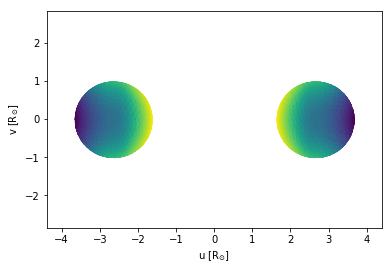

In [18]:
afig, mplfig = b.filter(kind='mesh').plot(time=0.25, fc='abs_normal_intensities', 
                                          ec="face", show=True)

# Exercise

Make a mesh plot (at any single time) to show the limb-darkening across the surface of the star.  Play with changing the underlying limb-darkening model and re-plotting.

Try making an animation with the meshes.